In [1]:
# 1. Librairies
import pandas as pd
import numpy as np

# 1. REGRESSION OF USING LINEARIZATION ON FEATURES

In [2]:
maintenance = pd.read_csv('ai4i2020.csv')
#Source: https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [3]:
maintenance.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
maintenance.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
# 2. Data preprocessing
osf_maintenance = maintenance.drop(columns=['UDI', 'Product ID', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Machine failure', 'TWF', 'HDF', 'OSF', 'RNF', 'PWF'])
osf_maintenance

,Type,Torque [Nm],Tool wear [min]
0,M,42.8,0
1,L,46.3,3
2,L,49.4,5
3,L,39.5,7
4,L,40.0,9
...,...,...,...
9995,M,29.5,14
9996,H,31.8,17
9997,M,33.4,22
9998,H,48.5,25


In [6]:
len(osf_maintenance[osf_maintenance['Tool wear [min]'] == 0])

120

In [7]:
osf_maintenance.drop(osf_maintenance[osf_maintenance['Tool wear [min]'] == 0].index, inplace=True)
osf_maintenance

,Type,Torque [Nm],Tool wear [min]
1,L,46.3,3
2,L,49.4,5
3,L,39.5,7
4,L,40.0,9
5,M,41.9,11
...,...,...,...
9995,M,29.5,14
9996,H,31.8,17
9997,M,33.4,22
9998,H,48.5,25


In [8]:
osf_maintenance['Tool wear [min]'] = np.log(osf_maintenance['Tool wear [min]'])
osf_maintenance['Torque [Nm]'] = np.log(osf_maintenance['Torque [Nm]'])
osf_maintenance

,Type,Torque [Nm],Tool wear [min]
1,L,3.835142,1.098612
2,L,3.899950,1.609438
3,L,3.676301,1.945910
4,L,3.688879,2.197225
5,M,3.735286,2.397895
...,...,...,...
9995,M,3.384390,2.639057
9996,H,3.459466,2.833213
9997,M,3.508556,3.091042
9998,H,3.881564,3.218876


In [10]:
osf_maintenance['overstrain [minNm]'] = osf_maintenance['Torque [Nm]'] + osf_maintenance['Tool wear [min]']
osf_maintenance

,Type,Torque [Nm],Tool wear [min],overstrain [minNm]
1,L,3.835142,1.098612,4.933754
2,L,3.899950,1.609438,5.509388
3,L,3.676301,1.945910,5.622211
4,L,3.688879,2.197225,5.886104
5,M,3.735286,2.397895,6.133181
...,...,...,...,...
9995,M,3.384390,2.639057,6.023448
9996,H,3.459466,2.833213,6.292680
9997,M,3.508556,3.091042,6.599598
9998,H,3.881564,3.218876,7.100440


In [11]:
osf_maintenance[['Type']] = osf_maintenance[['Type']].astype('category')
osf_maintenance.dtypes

Type                  category
Torque [Nm]            float64
Tool wear [min]        float64
overstrain [minNm]     float64
dtype: object

In [18]:
#3. Heat map
from sklearn.preprocessing import LabelEncoder

In [13]:
label = LabelEncoder()
label.fit(osf_maintenance.Type)
osf_maintenance.Type = label.transform(osf_maintenance.Type)
osf_maintenance.dtypes

Type                    int32
Torque [Nm]           float64
Tool wear [min]       float64
overstrain [minNm]    float64
dtype: object

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

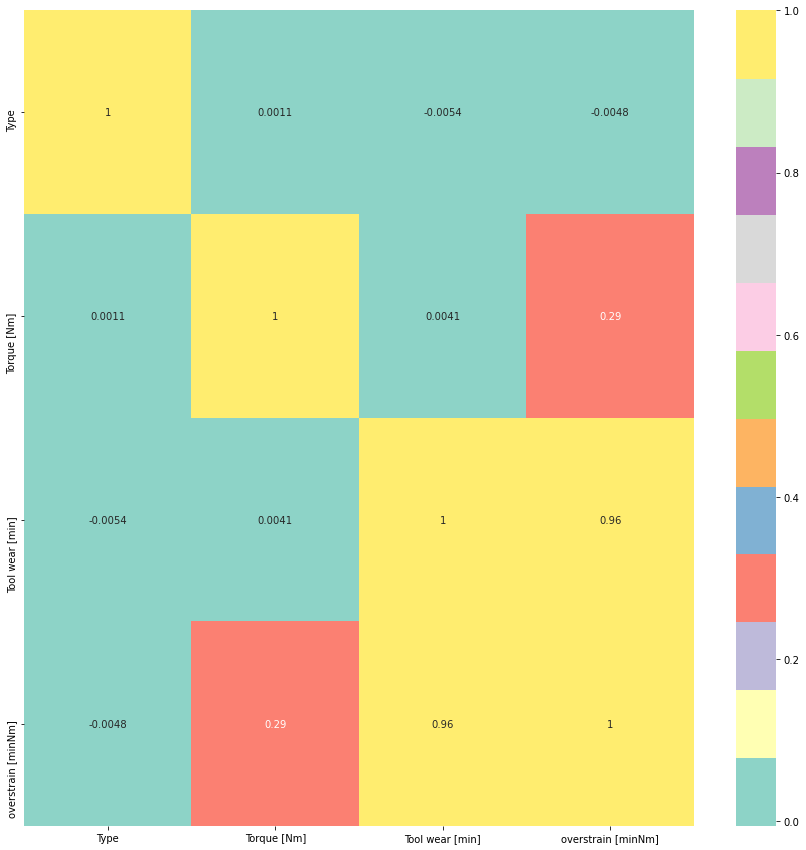

In [15]:
f, ax = plt.subplots(1, 1, figsize=(15, 15))
ax = sns.heatmap(osf_maintenance.corr(), annot=True, cmap='Set3')

In [15]:
# 4. Multicollinearity
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
independent_variables = ['Type', 'Torque [Nm]', 'Tool wear [min]']
X = osf_maintenance[independent_variables]
y = osf_maintenance['overstrain [minNm]']

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,4.9,Type
1,24.3,Torque [Nm]
2,21.2,Tool wear [min]


Dealing with Multicolinearity

Standardize the columns torque and rotational speed

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
osf_maintenance[['Torque [Nm]', 'Tool wear [min]']] = StandardScaler().fit_transform(osf_maintenance[['Torque [Nm]', 'Tool wear [min]']])
osf_maintenance

,Type,Torque [Nm],Tool wear [min],overstrain [minNm]
1,1,0.658081,-3.587336,4.933754
2,1,0.892693,-3.033576,5.509388
3,1,0.083064,-2.668824,5.622211
4,1,0.128600,-2.396387,5.886104
5,2,0.296595,-2.178850,6.133181
...,...,...,...,...
9995,2,-0.973674,-1.917419,6.023448
9996,0,-0.701893,-1.706945,6.292680
9997,2,-0.524185,-1.427445,6.599598
9998,0,0.826132,-1.288868,7.100440


In [18]:
osf_maintenance[osf_maintenance['overstrain [minNm]'] > 9.3]

,Type,Torque [Nm],Tool wear [min],overstrain [minNm]
69,1,1.924952,0.915434,9.437372
160,1,1.638404,1.048777,9.481222
161,1,1.099203,1.058768,9.341491
242,1,1.523279,0.976134,9.382410
248,1,1.398004,1.048777,9.414815
...,...,...,...,...
9667,1,0.855866,1.153921,9.362048
9822,1,1.650312,0.892490,9.340342
9827,2,1.410729,0.954452,9.331318
9830,1,1.353113,0.997391,9.355012


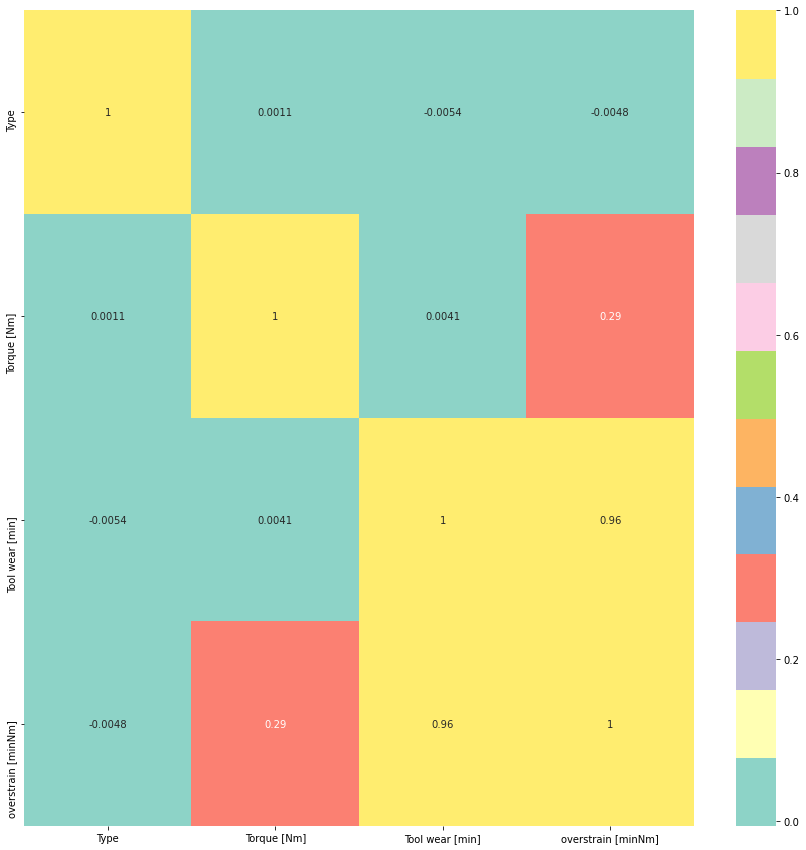

In [19]:
f, ax = plt.subplots(1, 1, figsize=(15, 15))
ax = sns.heatmap(osf_maintenance.corr(), annot=True, cmap='Set3')

In [20]:
independent_variables = ['Type', 'Torque [Nm]', 'Tool wear [min]']
X = osf_maintenance[independent_variables]
y = osf_maintenance['overstrain [minNm]']

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.0,Type
1,1.0,Torque [Nm]
2,1.0,Tool wear [min]


In [21]:
# 5. Data split
features = osf_maintenance.iloc[:,0:3]
labels = osf_maintenance.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state=42)

In [10]:
# 6. Neural Network Model: Keras Sequential
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
# 6.1. Manual tuning: learning rate
def design_model_dropout(features, learning_rate):
    model = Sequential(name='my_first_model')
    #number of features
    num_features = features.shape[1]
    #create a input vector for the layer and add to the model
    my_input = InputLayer(input_shape=(num_features,))
    model.add(my_input)
    #add 128 hidden layers with activation function relu = 'rectified linear unit'
    model.add(Dense(16, activation='relu'))
    #regularization: dropout
    model.add(layers.Dropout(0.1))
    model.add(Dense(8, activation = 'relu'))
    model.add(layers.Dropout(0.2))
    model.add(Dense(4, activation = 'relu'))
    model.add(layers.Dropout(0.3))
    #add output layer with 1 neuron
    model.add(Dense(1))
    #add optimizer Adam
    opt = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', metrics=['mae'], optimizer =opt)
    return model


In [26]:
def design_model_no_dropout(X, learning_rate):
    model = Sequential(name='my_first_model')
    my_input = InputLayer(input_shape=(X.shape[1],))
    model.add(my_input)
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1))
    opt = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', metrics=['mae'], optimizer=opt)
    return model

In [27]:
def fit_model(model, f_train, l_train, learning_rate, num_epochs):
    #train the model on the training data
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    history = model.fit(f_train, l_train, epochs=num_epochs, batch_size=16, verbose=0, validation_split=0.2, callbacks=[es])
    return history


In [36]:
#make a list of learning rates to try out
learning_rate = 0.01
#fixed number of epochs
num_epochs = 200
#fixed number of batches
#batch_size = [4, 32, 64]

In [37]:
#train the model wihtout dropout
history1 = fit_model(design_model_no_dropout(features_train, learning_rate), features_train, labels_train, learning_rate, num_epochs)
#train the model with dropout
history2 = fit_model(design_model_dropout(features_train, learning_rate), features_train, labels_train, learning_rate, num_epochs)


Epoch 00027: early stopping
Epoch 00025: early stopping


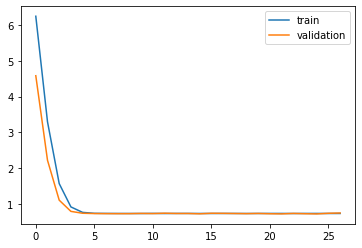

In [38]:
plt.plot(history1.history['mae'], label='train')
plt.plot(history1.history['val_mae'], label='validation')
plt.legend(loc='upper right')

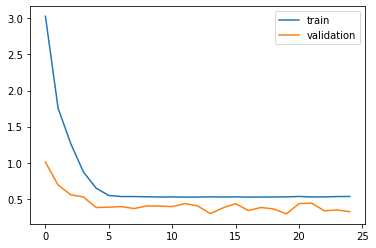

In [39]:
plt.plot(history2.history['mae'], label='train')
plt.plot(history2.history['val_mae'], label='validation')
plt.legend(loc='upper right')

# 2. CLASSIFICATION

In [11]:
maintenance.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [12]:
hdf_maintenance = maintenance.drop(columns=['UDI', 'Product ID', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'OSF', 'RNF'])
hdf_maintenance

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],HDF,PWF
0,M,298.1,308.6,1551,0,0
1,L,298.2,308.7,1408,0,0
2,L,298.1,308.5,1498,0,0
3,L,298.2,308.6,1433,0,0
4,L,298.2,308.7,1408,0,0
...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,0,0
9996,H,298.9,308.4,1632,0,0
9997,M,299.0,308.6,1645,0,0
9998,H,299.0,308.7,1408,0,0


In [13]:
hdf_maintenance['Dif temperature [K]'] = hdf_maintenance['Process temperature [K]'] - hdf_maintenance['Air temperature [K]']
hdf_maintenance = hdf_maintenance.drop(columns=['Air temperature [K]', 'Process temperature [K]', 'PWF'])
hdf_maintenance

,Type,Rotational speed [rpm],HDF,Dif temperature [K]
0,M,1551,0,10.5
1,L,1408,0,10.5
2,L,1498,0,10.4
3,L,1433,0,10.4
4,L,1408,0,10.5
...,...,...,...,...
9995,M,1604,0,9.6
9996,H,1632,0,9.5
9997,M,1645,0,9.6
9998,H,1408,0,9.7


In [14]:
hdf_maintenance = hdf_maintenance.reindex(columns=['Type', 'Dif temperature [K]', 'Rotational speed [rpm]', 'HDF'])
hdf_maintenance

,Type,Dif temperature [K],Rotational speed [rpm],HDF
0,M,10.5,1551,0
1,L,10.5,1408,0
2,L,10.4,1498,0
3,L,10.4,1433,0
4,L,10.5,1408,0
...,...,...,...,...
9995,M,9.6,1604,0
9996,H,9.5,1632,0
9997,M,9.6,1645,0
9998,H,9.7,1408,0


In [15]:
hdf_maintenance[['Type']] = hdf_maintenance[['Type']].astype('category')
hdf_maintenance.dtypes

Type                      category
Dif temperature [K]        float64
Rotational speed [rpm]       int64
HDF                          int64
dtype: object

In [19]:
label = LabelEncoder()
label.fit(hdf_maintenance.Type)
hdf_maintenance.Type = label.transform(hdf_maintenance.Type)
hdf_maintenance.dtypes

Type                        int32
Dif temperature [K]       float64
Rotational speed [rpm]      int64
HDF                         int64
dtype: object

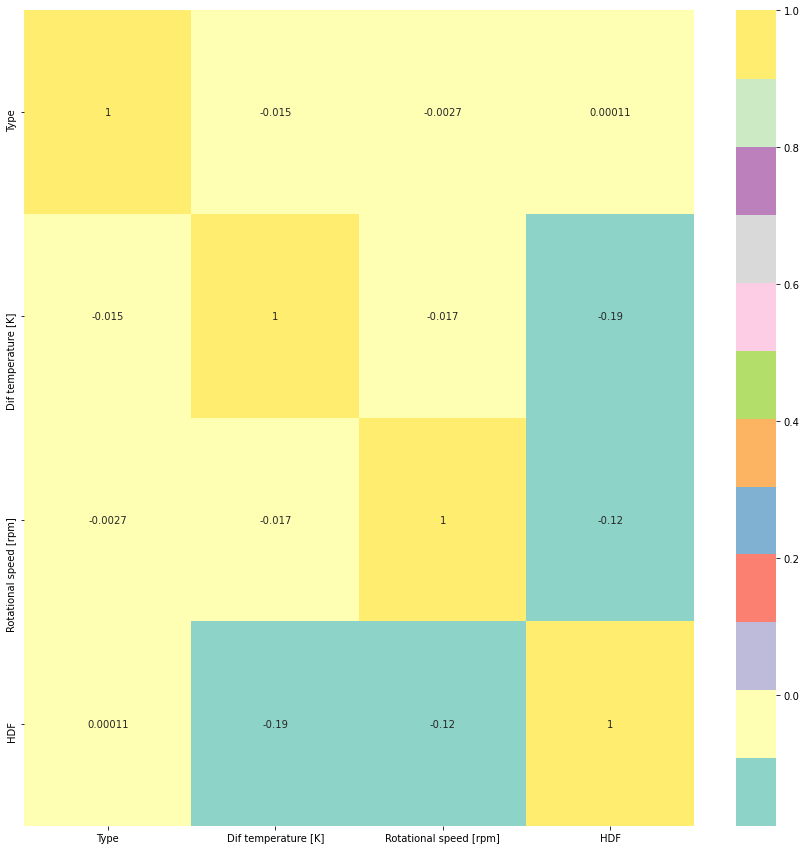

In [20]:
#Correlation matrix
f, ax = plt.subplots(1, 1, figsize=(15, 15))
ax = sns.heatmap(hdf_maintenance.corr(), annot=True, cmap='Set3')

In [21]:
features = hdf_maintenance.iloc[:,0:-1]
labels = hdf_maintenance.iloc[:,-1]

In [22]:
#Preparing the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 30)

In [36]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np

In [24]:
# Using Keras function to_categorical to convert into one-hot-encodings. for cross entropy
#Convert the integer
y_train = to_categorical(y_train, dtype='int64')
y_test = to_categorical(y_test, dtype='int64')


In [25]:
#Designing a deep learning model for classification
def design_class(f_train):
    my_model = Sequential()
    my_model.add(InputLayer(input_shape=(f_train.shape[1],)))
    my_model.add(Dense(16, activation='relu'))
    my_model.add(Dense(2, activation='sigmoid'))
    #setting the optimizer
    my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return my_model
    

In [29]:
def fit_class(my_model, f_train, l_train):
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    history_class = my_model.fit(f_train, l_train, epochs = 200, batch_size=16, verbose=1, validation_split=0.2, callbacks=[es])
    return history_class
    

In [30]:
history3 = fit_class(design_class(x_train), x_train, y_train)

Epoch 1/200
400/400 [==============================] - 3s 6ms/step - loss: 15.1689 - accuracy: 0.8345 - val_loss: 0.0656 - val_accuracy: 0.9887
Epoch 2/200
400/400 [==============================] - 1s 2ms/step - loss: 0.0824 - accuracy: 0.9876 - val_loss: 0.0674 - val_accuracy: 0.9887
Epoch 3/200
400/400 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9898 - val_loss: 0.0851 - val_accuracy: 0.9887
Epoch 4/200
400/400 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.9887 - val_loss: 0.1251 - val_accuracy: 0.9887
Epoch 5/200
400/400 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9905 - val_loss: 0.1056 - val_accuracy: 0.9887
Epoch 6/200
400/400 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9901 - val_loss: 0.3137 - val_accuracy: 0.9887
Epoch 7/200
400/400 [==============================] - 1s 2ms/step - loss: 0.2060 - accuracy: 0.9856 - val_loss: 0.1454 - val_accuracy: 0.988

In [49]:
#get additional statistics: classification reports
y_estimate = np.argmax(design_class(x_train).predict(x_test), axis = 1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_estimate, zero_division =0))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1973
           1       0.00      0.00      0.00        27

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.97      0.99      0.98      2000

